# Modelo para la formación de producto de una reacción tipo: A+B=C

- Antonio Lomelí Ureña
- Carolina Martínez Escalante 
- Enrique Tonatiuh Pérez Cortés Barba

## Objetivos

> #### 1.1 Objetivo general.
>  - Obtener el resultado en moles de la formación de un producto de una reacción tipo: A+B=C.

> #### 1.2 Objetivos específicos
>  - Plantear un caso práctico en el que se utiliza el modelo para la formación de producto de una reacción tipo: A+B=C.
>  - Demostrar el funcionamiento del modelo resolviendo el caso práctico utilizando la herramienta solve_ivp. 
>  - Ofrecer una visualización de los resultados obtenidos a través de una gráfica. 
>  - Analizar los resultados obtenidos para proponer una resolución acertada del caso propuesto. 


### Introducción

Los metales alcalinotérreos son elementos sumamente reactivos, es difícil encontrarlos aislados en la naturaleza y suelen reaccionar con el agua en forma violenta (1). Sin embargo, las reacciones entre algunos uno de ellos o compuestos de ellos y el agua son muy ilustrativas. Además, se utilizan en sustancias que los tienen como elementos, como el hidróxido de sodio, con relativa frecuencia en prácticas de laboratorio. 

Muchas veces estas reacciones liberan una gran cantidad de energía en forma de calor y pueden presentar un riesgo para el material o las personas que realizan la prueba. Empíricamente una persona puede saber bajo qué condiciones la reacción es riesgosa; sin embargo, hay modelos y herramientas que nos ayudan a determinar estas características.

Supongamos que somos los encargados del laboratorio de una universidad y vamos a diseñar una práctica. Queremos que óxido de calcio reaccione con agua para formar hidróxido de calcio, pero sabemos que es una reacción que puede calentar mucho el matraz, el material donde se lleva a cabo.

Para prevenir esto debemos de saber hasta qué cantidad de óxido de calcio podemos mezclar sin que representa un riesgo. Supongamos que si se forman más de 0.3 moles de hidróxido de calcio en los primeros 0.3 segundos de reacción, la reacción se volverá riesgosa.

La cantidad de agua que se usará para el experimento es de 150 ml y sabe que hay un modelo que describe la rapidez de reacción de una sustancia C formada a partir de dos sustancias A y B. 

   $$ y'(t)=k[\alpha-A(t)][\beta-B(t)] $$
   
Usando el modelo queremos saber cuántos gramos de óxido de calcio se pueden usar como reactivo bajo estas condiciones.

### Modelo que representa el problema


La ecuación que vamos a solucionar es la siguiente:
   $$ y'(t)=k[\alpha-A(t)][\beta-B(t)] $$
donde 
- $y'(t)$ representa la velocidad de reacción, queremos conocer $Y(t)$ que representaría la cantidad de producto C con respecto al tiempo
- $k$ es una constante que va de 0 a 1
- $\alpha$ es la cantidad total del reactivo A en la reacción
- $\beta$ es la cantidad total del reactivo B en la reacción
- $A(t)$ representa lo que se ha consumido de reactivo A con respecto al tiempo
- $B(t)$ representa lo que se ha consumido de reactivo B con respecto al tiempo

Escribimos en código la ecuación diferencial de la que parte el modelo:

In [4]:
def f(t,X,alf,bet,k):
    a1=X[0]
    b1=X[1]
    
    return k*(alf-a1)*(bet-b1)

Entendemos que una de sus limitaciones es que A(t) y B(t) tendrán el mismo comportamiento para nuestra solución, asumirá que se consumen a la misma velocidad.

### Simulaciones
#### Solución del problema


1. Nuestras condiciones iniciales siempre serán cero, porque en el tiempo cero no se ha consumido ninguna cantidad del reactivo A o B. 

2. La concentración del reactivo B (agua) será constante porque la cantidad que se tiene contemplada para el recipiente es de 150 ml. 

3. k será de 0.9 porque suponemos que el 90% de lo que se va consumiendo de reactivos formará el producto

4. Se simulará para 0.2 moles de reactivo A (óxido de calcio), para 0.3 moles, 0.35, 0.45 y 0.50 moles

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [6]:
k=0.9
bet=8.3
a0=[0,0,0,0,0] # Las condiciones iniciales, a(0) y b(0)
A=[0.2,0.3,0.35,0.45,0.50] # esta lista representa las concentraciones totales del reactivo A, los moles de óxido de calcio

soluciones=[]
tiempos=[]

for s in range(5):

    X=np.array([a0[s],a0[s]])

    alf=A[s]

    t=[0,0.3]

    sol=solve_ivp(f,t,X,args=(alf,bet,k,),max_step=0.009)

    soluciones.append(sol.y[0,:])
    tiempos.append(sol.t)

### Visualización de la solución del problema

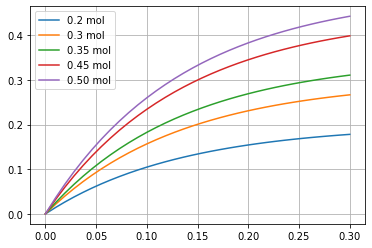

In [7]:
plt.figure()
nombres=['0.2 mol', '0.3 mol', '0.35 mol' ,'0.45 mol' ,'0.50 mol']

for i in range(5):
    
    plt.plot(tiempos[i],soluciones[i],label=nombres[i])

plt.grid()
plt.legend(loc='best')

Observamos que cuando se mezclan 0.35 moles de óxido de calcio se pasa la barrera de los 0.3 moles formados de C. Entonces, sabiendo que la masa molar del óxido de calcio es de 56 gr/mol, obtenemos que si usamos más de 19 gr (aprox.) de óxido de calcio y lo mezclamos con 150 ml de agua la reacción calentará mucho el vidrio del recipiente.

### Conclusiones

1. El caso planteado ayudó a ejemplificar el modelo expuesto.
2. Gracias a la herramienta solve_ivp se logró resolver el problema planteado.
3. Cada uno de los resultados obtenidos fue expuesto gráficamente de una manera que resultaron fáciles de interpretar a simple vista. 
4. Con los resultados obtenidos se puede concluir que no se pude mezclar más de 0.35 moles  (19 gr aprox.) de óxido de calcio con 150 ml de agua ya que si se realiza el calor desprendido de esa reacción podría ser dañino para los materiales y las personas. 
5. Resolver ecuaciones diferenciales por medio de simulaciones y soluciones numéricas es muy eficiente y sencillo. 

### Referencias

> - (1) IES Eduardo Pondal. Reactividad de los metales alcalinos. Recuperado de: http://www.edu.xunta.gal/centros/ieseduardopondalponteceso/node/370
> - UNIVERSIDAD DE PAMPLONA FACULTAD DE CIENCIAS BASICAS. (s. f.). PROYECTO DE QUÍMICA. Recuperado 30 de noviembre de 2022, de https://www.unipamplona.edu.co/unipamplona/portalIG/home_155/recursos/general/06112017/quimica.pdf